### Модели классификации

#### Цель работы

Познакомиться с основными приемами работы с моделями классификации в scikit-learn.

#### Задания для выполнения

1. Загрузите [данные](https://www.kaggle.com/uciml/pima-indians-diabetes-database) о диагностике сахарного диабета.
3. Постройте модель классификации для предсказания наличия заболевания.
4. Оцените качество построенной модели с помощью отчета о классификации и матрицы классификации.
5. Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

#### 1. Загрузите [данные](https://www.kaggle.com/uciml/pima-indians-diabetes-database) о диагностике сахарного диабета.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

In [7]:

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [10]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 2. Постройте модель классификации для предсказания наличия заболевания.

In [11]:
X = data.drop(["Outcome"], axis=1)
y = data.Outcome


In [12]:
y.shape, X.shape

((768,), (768, 8))

In [13]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X, y)

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
lr_model.coef_[0]

array([ 1.17252332e-01,  3.35998166e-02, -1.40873833e-02, -1.27048749e-03,
       -1.24032007e-03,  7.72023674e-02,  1.41904162e+00,  1.00353872e-02])

In [15]:
_ = [print(k, v) for k, v in zip(X.columns, lr_model.coef_[0])]

Pregnancies 0.1172523324756182
Glucose 0.033599816581976624
BloodPressure -0.014087383329434464
SkinThickness -0.0012704874927219254
Insulin -0.0012403200732095704
BMI 0.077202367431347
DiabetesPedigreeFunction 1.4190416198317923
Age 0.010035387154184266


In [16]:
print("Intercept: \n", lr_model.intercept_)

Intercept: 
 [-7.70291145]


In [18]:
y_pred = lr_model.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


#### 3. Оцените качество построенной модели с помощью отчета о классификации и матрицы классификации.

In [19]:
from sklearn import metrics
import seaborn as sns
metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]])

<Axes: >

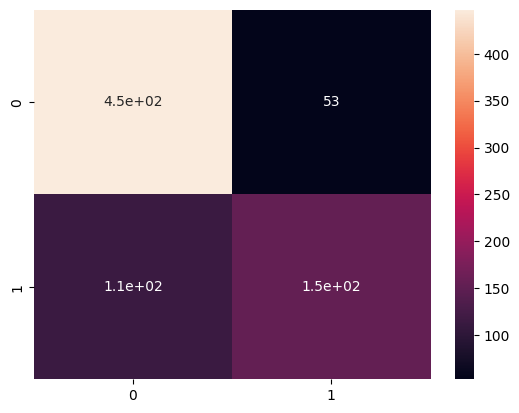

In [20]:
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

154 - True Positive \
53 - False Positive (ошибка 1го рода) \
114 - False Negative (ошибка 2го рода) \
447 - True Negative \

In [21]:
lr_model.score(X, y)

0.7825520833333334

In [22]:
metrics.accuracy_score(y, y_pred)

0.7825520833333334

#### 4. Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly = poly.fit_transform(X)
poly

array([[1.00000e+00, 6.00000e+00, 1.48000e+02, ..., 3.93129e-01,
        3.13500e+01, 2.50000e+03],
       [1.00000e+00, 1.00000e+00, 8.50000e+01, ..., 1.23201e-01,
        1.08810e+01, 9.61000e+02],
       [1.00000e+00, 8.00000e+00, 1.83000e+02, ..., 4.51584e-01,
        2.15040e+01, 1.02400e+03],
       ...,
       [1.00000e+00, 5.00000e+00, 1.21000e+02, ..., 6.00250e-02,
        7.35000e+00, 9.00000e+02],
       [1.00000e+00, 1.00000e+00, 1.26000e+02, ..., 1.21801e-01,
        1.64030e+01, 2.20900e+03],
       [1.00000e+00, 1.00000e+00, 9.30000e+01, ..., 9.92250e-02,
        7.24500e+00, 5.29000e+02]], shape=(768, 45))

In [25]:

polynomial = LogisticRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
metrics.accuracy_score(y, y_pred_poly)

0.7239583333333334

In [29]:
metrics.confusion_matrix(y, y_pred_poly)

array([[405,  95],
       [117, 151]])

<Axes: >

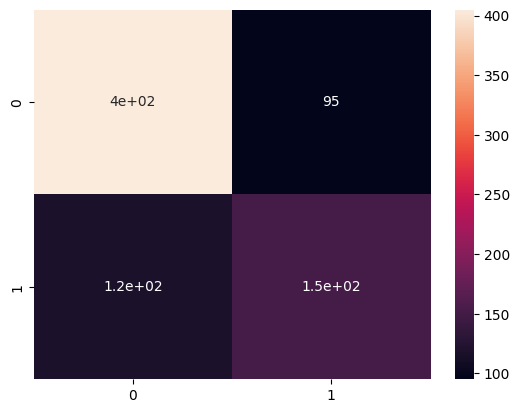

In [27]:
sns.heatmap(metrics.confusion_matrix(y, y_pred_poly), annot=True)

#### Задания для самостоятельного выполнения
#### 1. Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

penalty: Вид регуляризации ('l1', 'l2', 'elasticnet', 'none') \
C: Обратная сила регуляризации (меньше значение → сильнее регуляризация) \
solver: Алгоритм оптимизации ('liblinear', 'saga', 'lbfgs', 'newton-cg') \
max_iter: Максимальное число итераций \
class_weight: Взвешивание классов, полезно при несбалансированных классах


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


model_default = LogisticRegression(max_iter=200)
model_default.fit(X_train, y_train)
print("Стандартная:", model_default.score(X_test, y_test))

model_strong_reg = LogisticRegression(C=0.01, max_iter=200)
model_strong_reg.fit(X_train, y_train)
print("Сильная регуляризация:", model_strong_reg.score(X_test, y_test))

Стандартная: 0.7239583333333334
Сильная регуляризация: 0.7083333333333334


#### 2. Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [34]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Логистическая регрессия": LogisticRegression(max_iter=1000),
        "Метод опорных векторов (линейное ядро)": SVC(kernel='linear', probability=True),
        "Метод опорных векторов (гауссовое ядро)": SVC(kernel='rbf', probability=True),
        "Метод ближайших соседей": KNeighborsClassifier(),
        "Дерево решений": DecisionTreeClassifier(),
        "Случайный лес": RandomForestClassifier(),
        "Градиентный бустинг": GradientBoostingClassifier(),
        "Беггинг": BaggingClassifier(),
        "Многослойный перцептрон": MLPClassifier(max_iter=1000)
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) # Берём вероятность положительного класса
        
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="weighted")

        cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted').mean()

        print(f"{model_name}:")
        print(f"  ROC-AUC: {roc_auc:.4f}")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  F1-score: {f1:.4f}")
        print(f"  Кросс-валидация (F1-score): {cv_score:.4f}\n")

In [35]:
data_iris = load_iris()
X, y = data_iris.data, data_iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_and_evaluate_models(X_train, X_test, y_train, y_test)

Логистическая регрессия:
  ROC-AUC: 1.0000
  Accuracy: 1.0000
  F1-score: 1.0000
  Кросс-валидация (F1-score): 0.9657

Метод опорных векторов (линейное ядро):
  ROC-AUC: 1.0000
  Accuracy: 1.0000
  F1-score: 1.0000
  Кросс-валидация (F1-score): 0.9574

Метод опорных векторов (гауссовое ядро):
  ROC-AUC: 1.0000
  Accuracy: 1.0000
  F1-score: 1.0000
  Кросс-валидация (F1-score): 0.9477

Метод ближайших соседей:
  ROC-AUC: 1.0000
  Accuracy: 1.0000
  F1-score: 1.0000
  Кросс-валидация (F1-score): 0.9393

Дерево решений:
  ROC-AUC: 1.0000
  Accuracy: 1.0000
  F1-score: 1.0000
  Кросс-валидация (F1-score): 0.9494

Случайный лес:
  ROC-AUC: 1.0000
  Accuracy: 1.0000
  F1-score: 1.0000
  Кросс-валидация (F1-score): 0.9476

Градиентный бустинг:
  ROC-AUC: 1.0000
  Accuracy: 1.0000
  F1-score: 1.0000
  Кросс-валидация (F1-score): 0.9410

Беггинг:
  ROC-AUC: 1.0000
  Accuracy: 1.0000
  F1-score: 1.0000
  Кросс-валидация (F1-score): 0.9410

Многослойный перцептрон:
  ROC-AUC: 1.0000
  Accuracy: 1